In [1]:
# ## Step 3 - Climate Analysis and Exploration

# You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. 
# All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymysql
pymysql.install_as_MySQLdb()

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float

from sqlalchemy import create_engine, inspect
engine = create_engine("sqlite:///hawaii_final.sqlite", echo = False)
inspector = inspect(engine)

from sqlalchemy.orm import Session
session = Session(engine)
from sqlalchemy import func

import datetime as dt 
import time


In [2]:
# * Use SQLAlchemy `create_engine` to connect to your sqlite database.
# * Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.Base = automap_base()
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()
Measurements = Base.classes.measurements
Stations = Base.classes.stations

['measurements', 'stations']

In [3]:
# * Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

startdate = dt.datetime.today()
enddate = startdate + dt.timedelta(days=3)
startdateString = startdate.strftime("%Y-%m-%d")
enddateString = enddate.strftime("%Y-%m-%d")
print (f'Start Date: {startdateString}')
print (f'End Date: {enddateString}')

# print (yearAgoString)

Start Date: 2018-04-10
End Date: 2018-04-13


In [4]:
# ### Precipitation Analysis

# * Design a query to retrieve the last 12 months of precipitation data.
yearAgo = startdate + dt.timedelta(days=-2*365)
yearAgoString = yearAgo.strftime("%Y-%m-%d")
# * Select only the `date` and `prcp` values.
columns = inspector.get_columns('measurements')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station VARCHAR(255)
date DATETIME
prcp FLOAT
tobs INTEGER


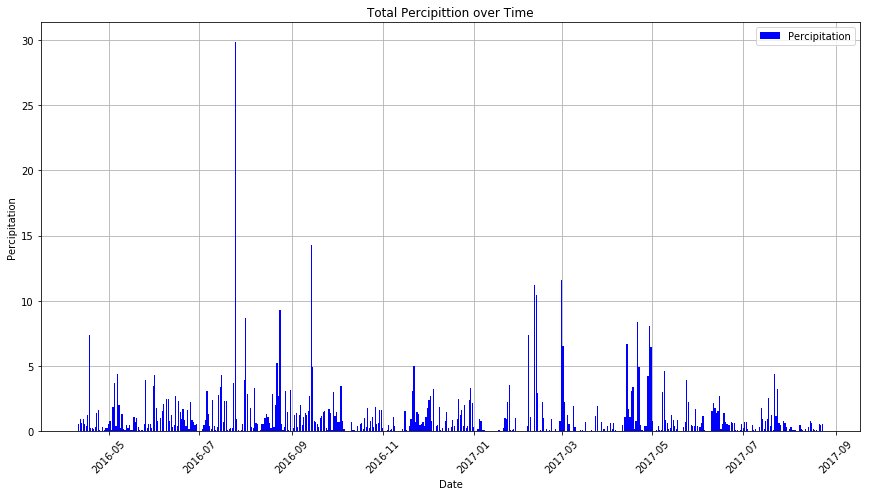

In [35]:
# * Load the query results into a Pandas DataFrame and set the index to the date column.
# * Plot the results using the DataFrame `plot` method.

percipitation = session.query(Measurements.date, func.sum(Measurements.prcp))\
                .filter(Measurements.date >= yearAgo)\
                .group_by(Measurements.date).all()
dates = []
rains = []
for row in percipitation:
    date = row[0]
    dates.append(date)
    rain = row[1]
    rains.append(rain)
percipitation_DF = pd.DataFrame({"Date":dates, "prcp":rains})
percipitation_DF.head()
plt.figure(figsize=(12, 7))
plt.rc('axes', axisbelow=True)
plt.bar(percipitation_DF['Date'], percipitation_DF['prcp'], color="blue", alpha=1, label="Percipitation")
plt.title("Total Percipittion over Time")
plt.xlabel("Date")
plt.grid(b='on')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Percipitation")
plt.legend()
plt.savefig("images/percipitation.png", bbox_inches="tight")
plt.show()

In [6]:
# * Use Pandas to print the summary statistics for the precipitation data.
summary = percipitation_DF.describe()
summary

,prcp
count,500.000000
mean,1.085220
std,2.128126
min,0.000000
25%,0.080000
50%,0.450000
75%,1.222500
max,29.850000


In [7]:
# ### Station Analysis

# * Design a query to calculate the total number of stations.
station_count = len(session.query(func.count(Measurements.prcp))\
                .group_by(Measurements.station).all())
print (f'Station Count: {station_count}')

Station Count: 9


In [8]:
# * Design a query to find the most active stations.

#   * List the stations and observation counts in descending order
#   * Which station has the highest number of observations?
obs_count = session.query(Measurements.station, func.count(Measurements.tobs))\
            .group_by(Measurements.station)\
            .order_by(func.count(Measurements.tobs).desc()).all()
print (obs_count)
most_active = obs_count[0][0]
print (f'Most Active Station: {most_active}')



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Most Active Station: USC00519281


59
83


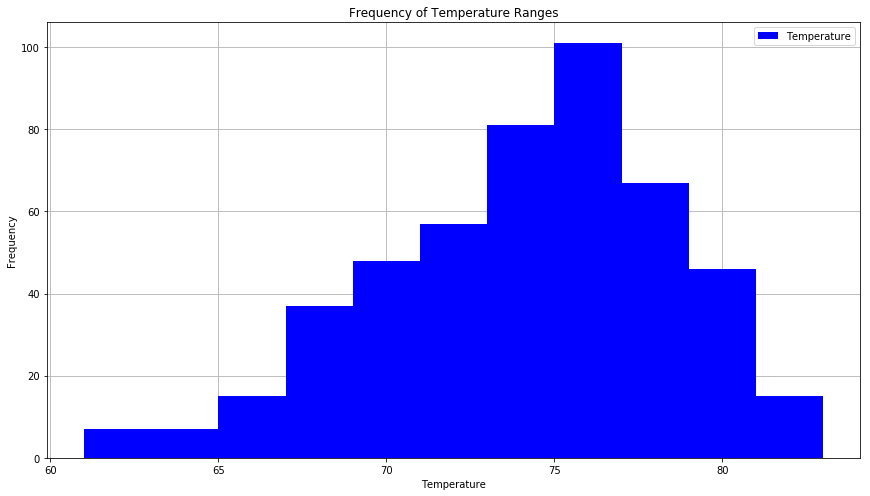

In [9]:
# * Design a query to retrieve the last 12 months of temperature observation data (tobs).
#   * Filter by the station with the highest number of observations.
#   * Plot the results as a histogram with `bins=12`.

temps = session.query(Measurements.tobs)\
        .filter(Measurements.station == most_active)\
        .filter(Measurements.date >= yearAgo).all()
temp_list = []
for temp in temps:
    temp = temp[0]
    temp_list.append(temp)
min_temp = min(temp_list)
print (min_temp)
max_temp = max(temp_list)
print (max_temp)
temp_range = max_temp - min_temp
bin_size = temp_range/12
bin1 = min_temp + bin_size
bin2 = bin1 + bin_size
bin3 = bin2 + bin_size
bin4 = bin3 + bin_size
bin5 = bin4 + bin_size
bin6 = bin5 + bin_size
bin7 = bin6 + bin_size
bin8 = bin7 + bin_size
bin9 = bin8 + bin_size
bin10 = bin9 + bin_size
bin11 = bin10 + bin_size
bin12 = bin11 + bin_size
temp_DF = pd.DataFrame({"tobs":temp_list})

bins = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10, bin11, bin12]
groups = ["<"+str(bin2),"<"+str(bin3),"<"+str(bin4),"<"+str(bin5),"<"+str(bin6),"<"+str(bin7),
         "<"+str(bin8),"<"+str(bin9),"<"+str(bin10),"<"+str(bin11),"<"+str(bin12)]

temp_DF['binned'] = pd.cut(temp_DF["tobs"], bins, labels=groups)
temp_DF

plt.figure(figsize=(12, 7))
plt.grid(b='on')
plt.rc('axes', axisbelow=True)
plt.hist(temp_DF['tobs'], bins=bins, color="blue", alpha=1, label="Temperature")
plt.title("Frequency of Temperature Ranges")
plt.xlabel("Temperature")
plt.tight_layout()
plt.ylabel("Frequency")
plt.legend()
plt.savefig('images/temp_hist.png')
plt.show()



               avg  min  max
date                        
2018-02-10  67.875   65   70
2018-02-11  68.250   62   77
2018-02-12  67.125   63   71
2018-02-13  67.875   65   71
2018-02-14  70.750   66   79


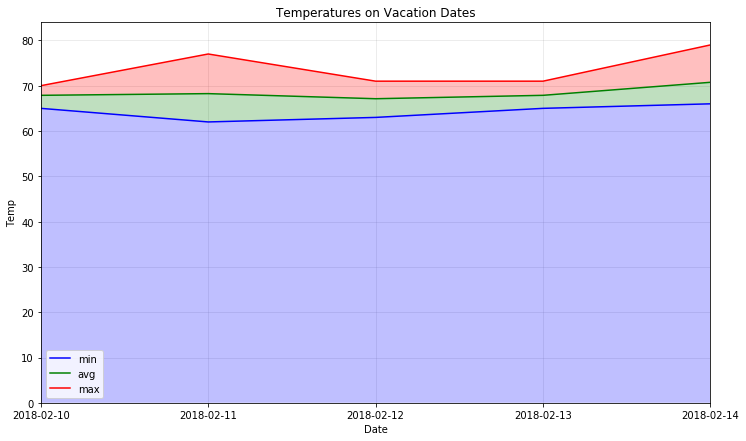

                          avg_temp  min_temp  max_temp
date_range                                            
2018-02-10 to 2018-02-14    68.375        62        79


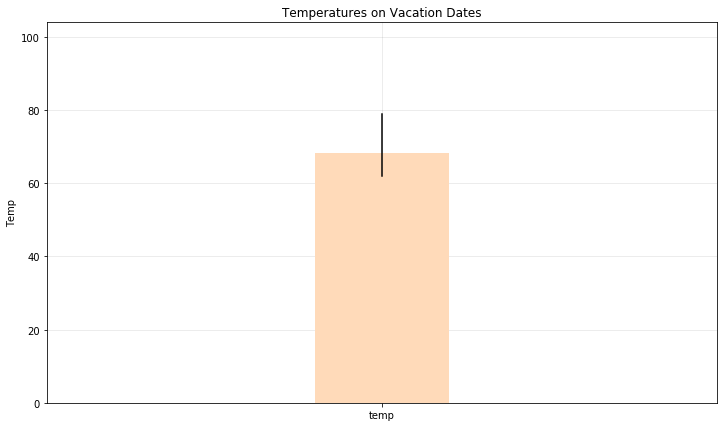

In [33]:
# ### Temperature Analysis
# * Write a function called `calc_temps` that will accept a start date and end date
# in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures 
# for that range of dates.
# * Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
# * Plot the min, avg, and max temperature from your previous query as a bar chart.
#   * Use the average temperature as the bar height.
#   * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
# ### Optional Recommended Analysis
# * The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.
#   * Calcualte the rainfall per weather station using the previous year's matching dates.
# * Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.
#   * Create a function called `daily_normals` that will calculate the daily normals for a specific date. 
# This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.
#   * Create a list of dates for your trip in the format `%m-%d`. 
# Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.
#   * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
#   * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

def calc_temps(vacStart, vacEnd):
    try:
        monthStart = int(vacStart[5:7])
        dayStart = int(vacStart[8:])
        monthEnd = int(vacEnd[5:7])
        dayEnd = int(vacEnd[8:])
        vacStartDT = dt.datetime(2018, monthStart, dayStart)
        vacEndDT = dt.datetime(2018, monthEnd, dayEnd)
        duration = (vacEndDT - vacStartDT).days
    #     print(duration)
        t_list = []
        t_list_string = []
        min_list = []
        avg_list = []
        max_list = []
        all_temps = []
        for x in np.arange(duration + 1):
            t_day = (vacStartDT + dt.timedelta(days = int(x)))
            t_list_string.append(dt.datetime.strftime(t_day, "%Y-%m-%d"))
            
            t_list.append(t_day)
    #         print (t_day)
            vacation_temps = session.query(Measurements.date, Measurements.tobs)\
                                .filter(func.extract('month', Measurements.date) == t_day.month)\
                                .filter(func.extract('day', Measurements.date) == t_day.day)\
                                .group_by(Measurements.date).all()
            temp_list = []
            for temp in vacation_temps:
                temp = temp[1]
                temp_list.append(temp)
                all_temps.append(temp)
    #         print (temp_list)
            min_temp = min(temp_list)
            min_list.append(min_temp)
            max_temp = max(temp_list)
            max_list.append(max_temp)
            avg_temp = np.mean(temp_list)
            avg_list.append(avg_temp)
        avg_all = np.mean(all_temps)
        max_all = max(all_temps)
        min_all = min(all_temps)
        daterange = t_list_string[0]+" to "+t_list_string[x]
        vacation_temps = pd.DataFrame({"date":t_list, "min":min_list, "avg":avg_list, "max":max_list})
        vacation_temps = vacation_temps.set_index(["date"])
        vacation_temps = vacation_temps[['avg', 'min', 'max']]
        all_temps_df = pd.DataFrame({"date_range":[daterange], "min_temp":[min_all], "max_temp":[max_all], "avg_temp":[avg_all]})
        all_temps_df = all_temps_df.set_index(["date_range"])
        all_temps_df = all_temps_df[['avg_temp', 'min_temp', 'max_temp']]
        fig, tx = plt.subplots(figsize=(12, 7))
        tx.plot(t_list, min_list, ls="solid", alpha = 1, c="blue", label = "min")
        tx.fill_between(x = t_list, y1 = min_list, y2 = 0, facecolor="blue", alpha = .25)
        tx.plot(t_list, avg_list, ls="solid", alpha = 1, c="green", label = "avg")
        tx.fill_between(x = t_list, y1 = min_list, y2 = avg_list, facecolor="green", alpha = .25)
        tx.plot(t_list, max_list, ls="solid", alpha = 1, c="red", label = "max")
        tx.fill_between(x = t_list, y1 = max_list, y2 = avg_list, facecolor="red", alpha = .25)
        tx.set_xticks(t_list, minor=False)
        tx.set_xticklabels(t_list_string, fontdict=None, minor=False)
        tx.set_xlim(min(t_list),max(t_list))
        tx.set_ylim(0,max(max_list)+5)
        tx.set_xlabel('Date')
        tx.set_ylabel('Temp')
        tx.set_title('Temperatures on Vacation Dates')
        tx.grid(color='grey', linestyle='-', linewidth=1, alpha = .15)
        tx.legend()
        fig.savefig("images/dailynormals.png")
        print (vacation_temps)
        plt.show()
        
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.bar(1, avg_all, align = "center", width = .4, color="peachpuff", alpha=1)
        ax.set_xticks([1])
        ax.set_xticklabels(["temp"], fontdict=None, minor=False)
        ax.set_xlim(0,2)
        ax.set_ylim(0,max_all+25)
        ax.set_ylabel('Temp')
        ax.set_title('Temperatures on Vacation Dates')
        ax.grid(color='grey', linestyle='-', linewidth=1, alpha = .15)
        ax.plot([1,1], [min_all, max_all], c="black", alpha = 1)
        fig.savefig("images/temp_avg.png")
        print (all_temps_df)
        plt.show()
    except:
        print("Please make sure that the dates in the following format: 'yyyy-mm-dd' (example: 2018-01-04)")
calc_temps("2018-02-10", "2018-02-14")  